Importanto bibliotecas necessárias

In [164]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Introdução


**Contextualização**

O objetivo do presente projeto de Ciência de Dados é explorar e analisar indicadores de fluxo da Educação Superior a partir de uma base de dados governamentais. O projeto tem a finalidade de prever o comportamento de uma variável principal em relação a diversas outras variáveis que podem influenciar seu desempenho. Na linguagem da estatística e da Ciência de Dados, a variável principal é comumente chamada de "Target", enquanto as demais variáveis que a influenciam são conhecidas como "Features".

**Tema e Objetivo**

O tema central deste projeto gira em torno da Educação Superior, sendo o objetivo principal responder a seguinte pergunta:

    É possível prever o número de desistências em cursos de graduação com base em indicadores específicos?

Para atingir esse objetivo, foi escolhida uma base de dados do governo nacional que contém informações abrangentes sobre instituições de ensino, cursos de graduação e seus respectivos indicadores. Utilizaremos esses dados para construir um modelo preditivo que permita prever a quantidade de desistências em cursos de graduação. A variável principal (ou "Target") é a "Quantidade de Desistência no Curso no ano de referência".

**Base de Dados**

A fonte de dados é uma base governamental, composta por microdados, que fornece informações detalhadas sobre instituições de ensino, cursos de graduação e outros dados acadêmicos. Essa base contém colunas que descrevem a instituição, o curso, a região geográfica, a unidade federativa, o grau acadêmico, bem como diversas métricas educacionais, como a quantidade de ingressantes, a quantidade de concluintes, a taxa de permanência e a taxa de conclusão, entre outras.

A base de dados pode ser obtida através do link abaixo, selecionando os anos 2018-2022.
https://www.gov.br/inep/pt-br/acesso-a-informacao/dados-abertos/indicadores-educacionais/indicadores-de-fluxo-da-educacao-superior 

Uma amostra dessa base de dados pode ser vista na seção abaixo:

In [187]:
df = pd.read_excel('indicadores_trajetoria_educacao_superior_2018_2022.xlsx')
df.head()

,Código da Instituição,Nome da Instituição,Categoria Administrativa,Organização Acadêmica,Código do Curso de Graduação,Nome do Curso de Graduação,Código da Região Geográfica do Curso,Código da Unidade Federativa do Curso,Código do Município do Curso,Grau Acadêmico,...,Quantidade de Ingressantes no Curso,Quantidade de Permanência no Curso no ano de referência,Quantidade de Concluintes no Curso no ano de referência,Quantidade de Desistência no Curso no ano de referência,Quantidade de Falecimentos no Curso no ano de referência,Taxa de Permanência - TAP,Taxa de Conclusão Acumulada - TCA,Taxa de Desistência Acumulada - TDA,Taxa de Conclusão Anual - TCAN,Taxa de Desistência Anual - TADA
0,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,1.0,1.0,1.0,DIREITO,5.0,51.0,5103403.0,1.0,...,100.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0
1,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,1.0,1.0,1.0,DIREITO,5.0,51.0,5103403.0,1.0,...,100.0,98.0,0.0,2.0,0.0,98.0,0.0,2.0,0.0,2.0
2,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,1.0,1.0,1.0,DIREITO,5.0,51.0,5103403.0,1.0,...,100.0,94.0,1.0,3.0,0.0,94.0,1.0,5.0,1.0,3.0
3,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,1.0,1.0,1.0,DIREITO,5.0,51.0,5103403.0,1.0,...,100.0,93.0,0.0,1.0,0.0,93.0,1.0,6.0,0.0,1.0
4,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,1.0,1.0,1.0,DIREITO,5.0,51.0,5103403.0,1.0,...,100.0,29.0,62.0,2.0,0.0,29.0,63.0,8.0,62.0,2.0


**Dicionário da base de dados**

- Código da Instituição: valor numérico referente à instituição
- Nome da Instituição: nome da instituição de ensino a que se referem os dados
- Categoria Administrativa: código da cateoria administrativa da instituição de ensino no último ano de análise
    1. Pública Federal
    2. Pública Estadual
    3. Pública Municipal
    4. Privada com fins lucrativos
    5. Privada sem fins lucrativos
    7. Especial
- Organização Acadêmica: código da organização acadêmica da instituição de ensino
    1. Universidade
    2. Centro Universitário
    3. Faculdade
    4. Instituto Federal de Educação, Ciência e Tecnologia                                
    5. Centro Federal de Educação Tecnológica
- Código do Curso de Graduação: código único de identificação do curso gerado pelo E-MEC
- Nome do Curso de Graduação: nome do curso com a informação do último ano de análise
- Código da Região Geográfica do Curso: código da Região Geográfica do local de oferta do curso gerado pelo E-MEC no último ano de análise
    1. Região Norte
    2. Região Nordeste
    3. Região Sudeste
    4. Região Sul
    5. Região Centro-Oeste
- Código da Unidade Federativa do Curso: código do estado da federação do local de oferta do curso
- Código do Município do Curso: código do município do local de oferta do curso gerado 
- Grau Acadêmico: grau conferido ao diplomado pelo curso
    1. Bacharelado
    2. Licenciatura
    3. Tecnológico
- Modalidade de Ensino: modalidade do curso no último ano de análise
    1. Presencial
    2. Curso a distância
- Código da área do Curso segundo a classificação CINE BRASIL: Código da área geral conforme adaptação da Classificação Internacional Normalizada da Educação Cine/Unesco.
- Nome da área do Curso segundo a classificação CINE BRASIL: Nome da área geral conforme adaptação da Classificação Internacional Normalizada da Educação Cine/Unesco.
- Código da Grande Área do Curso segundo a classificação CINE BRASIL: Código de identificação do curso, conforme adaptação da Classificação Internacional Normalizada da Educação Cine/Unesco.
- Nome da Grande Área do Curso segundo a classificação CINE BRASIL: Nome de identificação do curso, conforme adaptação da Classificação Internacional Normalizada da Educação Cine/Unesco.
- Ano de Ingresso: Ano de ingresso do aluno no curso.
- Ano de Referência: Ano de referência do vínculo do ingressante.
- Prazo de Integralização em Anos: Prazo mínimo de integralização de curso de graduação em número de anos, ou seja, tempo mínimo que o aluno pode levar para concluir o curso.
- Ano de Integralização do Curso: Ano previsto de integralização do aluno ao curso.
- Prazo de Acompanhamento do Curso em anos: Prazo máximo de integralização de curso de graduação em número de anos.
- Ano Máximo de Acompanhamento do Curso: Ano máximo de acompanhamento da situação de vínculo do aluno.
- Quantidade de Ingressantes no Curso: Número de ingressantes do curso no ano de ingresso da coorte.
- Quantidade de Permanência no Curso no ano de referência: Número de estudantes que permaneceram no curso de graduação no ano de referência da análise.
- Quantidade de Concluintes no Curso no ano de referência: Número de estudantes que concluíram o curso de graduação no ano de referência da análise.
- Quantidade de Desistência no Curso no ano de referência: Número de estudantes que desistiram do curso de graduação no ano de referência da análise.
- Quantidade de Falecimentos no Curso no ano de referência: Número de estudantes que faleceram no ano de referência da análise.
- Taxa de Permanência - TAP: Percentual de ingressantes que estão com vínculo ativo no curso no ano de referência.
- Taxa de Conclusão Acumulada - TCA: Percentual de ingressantes que concluíram o curso até o ano de referência.
- Taxa de Desistência Acumulada - TDA: Percentual de ingressantes que desistiram do curso até o ano de referência.
- Taxa de Conclusão Anual - TCAN: Percentual de ingressantes que concluíram o curso no ano de referência.
- Taxa de Desistência Anual - TADA: Percentual de ingressantes que desistiram do curso no ano de referência.

**Features considerados**

A partir da análise das informações contidas na base de dados, é possível identificar que nem todas as colunas dessa base possuem informações relevantes para o objetivo de prever o número de desistências em cursos de graduação. Algumas colunas possuem informações redundantes, e outras simplesmente representam códigos que fogem do interesse da análise. Portanto, foi selecionado um conjunto específico de colunas que podem ser mais pertinentes para a construção do modelo preditivo. Essas colunas, que representarão as "Features" ou variáveis independentes, são as seguintes:

    Nome da Instituição
    Categoria Administrativa
    Organização Acadêmica
    Código da Unidade Federativa do Curso
    Código do Município do Curso
    Grau Acadêmico
    Modalidade de Ensino
    Nome da área do Curso segundo a classificação CINE BRASIL
    Ano de Ingresso
    Ano de Referência
    Quantidade de Ingressantes no Curso
    Quantidade de Permanência no Curso no ano de referência
    Quantidade de Concluintes no Curso no ano de referência
    
    
**Variável de Destino (Target)**

Como o objetivo principal é prever o número de desistências em cursos de graduação, a variável de destino ou "Target" que será previsto é a "Quantidade de Desistência no Curso no ano de referência". Esta variável é fundamental, pois representa o número de alunos que abandonaram o curso durante o ano de referência, e o objetivo é entender os fatores que podem influenciar essa taxa de desistência.

A seleção cuidadosa das colunas de interesse e a escolha da variável de destino são passos essenciais para a construção de um modelo preditivo preciso e informativo. Com essas informações será possível realizar a análise e construção de modelos que permitirão prever e compreender as desistências em cursos de graduação.




**Estrutura do Projeto**

Serão exploradas técnicas de regressão para a previsão da variável quantitativa "Quantidade de Desistência no Curso". A qualidade da comunicação e apresentação dos resultados também será uma prioridade, assegurando que os resultados sejam compreensíveis para um público amplo.

Este projeto tem como objetivo fornecer previsões robustas e ir além de uma simples análise exploratória de dados. Espera-se que a análise e modelos desenvolvidos ajudem a entender e prever as desistências em cursos de graduação, o que pode ter implicações importantes na melhoria da Educação Superior.

# Obtendo informações relevantes da base de dados

Nome das colunas do dataframe

In [215]:
len(list(df))

31

Tipos de cada coluna

In [190]:
df.dtypes

Código da Instituição                                                  object
Nome da Instituição                                                    object
Categoria Administrativa                                              float64
Organização Acadêmica                                                 float64
Código do Curso de Graduação                                          float64
Nome do Curso de Graduação                                             object
Código da Região Geográfica do Curso                                  float64
Código da Unidade Federativa do Curso                                 float64
Código do Município do Curso                                          float64
Grau Acadêmico                                                        float64
Modalidade de Ensino                                                  float64
Código da área do Curso segundo a classificação CINE BRASIL            object
Nome da área do Curso segundo a classificação CINE BRASIL       

Alterando tipos das colunas e tornando os nomes mais intuitivos

In [199]:
# #Modificando os tipos
# df["Categoria Administrativa"] = df['Categoria Administrativa'].replace([1, 2, 3, 4, 5, 6], ['Pública Federal','Pública Estadual', 'Pública Municipal', 'Privada com fins lucrativos', 'Privada sem fins lucrativos', 'Especial'])
# df['Organização Acadêmica'] = df['Organização Acadêmica'].replace([1, 2, 3, 4, 5], ['Universidade', 'Centro Universitário', 'Faculdade', 'Instituto Federal de Educação, Ciência e Tecnologia', 'Centro Federal de Educação Tecnológica'])
# df['Grau Acadêmico'] = df['Grau Acadêmico'].replace([1, 2, 3], ['Bacharelado', 'Licenciatura', 'Tecnológico'])
# df['Código da Região Geográfica do Curso'] = df['Código da Região Geográfica do Curso'].replace([1,2,3,4,5],['Região Norte','Região Nordeste','Região Sudeste','Região Sul','Região Centro-Oeste'])
# df['Modalidade de Ensino'] = df['Modalidade de Ensino'].replace([1,2],['Presencial', 'Curso a distância'])

Verificando informações incompletas da base de dados


In [207]:
df.tail()

,Código da Instituição,Nome da Instituição,Categoria Administrativa,Organização Acadêmica,Código do Curso de Graduação,Nome do Curso de Graduação,Código da Região Geográfica do Curso,Código da Unidade Federativa do Curso,Código do Município do Curso,Grau Acadêmico,...,Quantidade de Ingressantes no Curso,Quantidade de Permanência no Curso no ano de referência,Quantidade de Concluintes no Curso no ano de referência,Quantidade de Desistência no Curso no ano de referência,Quantidade de Falecimentos no Curso no ano de referência,Taxa de Permanência - TAP,Taxa de Conclusão Acumulada - TCA,Taxa de Desistência Acumulada - TDA,Taxa de Conclusão Anual - TCAN,Taxa de Desistência Anual - TADA
164396,25352,Universidade Federal de Rondonópolis,Pública Federal,Universidade,1261971.0,MEDICINA,Região Centro-Oeste,51.0,5107602.0,Bacharelado,...,37.0,33.0,0.0,0.0,0.0,89.189189,0.0,10.810811,0.0,0.000000
164397,25352,Universidade Federal de Rondonópolis,Pública Federal,Universidade,1261971.0,MEDICINA,Região Centro-Oeste,51.0,5107602.0,Bacharelado,...,37.0,31.0,0.0,2.0,0.0,83.783784,0.0,16.216216,0.0,5.405405
164398,25352,Universidade Federal de Rondonópolis,Pública Federal,Universidade,1261971.0,MEDICINA,Região Centro-Oeste,51.0,5107602.0,Bacharelado,...,37.0,31.0,0.0,0.0,0.0,83.783784,0.0,16.216216,0.0,0.000000
164399,25352,Universidade Federal de Rondonópolis,Pública Federal,Universidade,1261971.0,MEDICINA,Região Centro-Oeste,51.0,5107602.0,Bacharelado,...,37.0,31.0,0.0,0.0,0.0,83.783784,0.0,16.216216,0.0,0.000000
164400,Fonte: Censo da Educação Superior/Inep.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Removendo linhas inúteis ou com elementos NaN

In [212]:
dados = df.drop(df.index[-1]).dropna()

In [213]:
# Exibindo o DataFrame resultante
dados

,Código da Instituição,Nome da Instituição,Categoria Administrativa,Organização Acadêmica,Código do Curso de Graduação,Nome do Curso de Graduação,Código da Região Geográfica do Curso,Código da Unidade Federativa do Curso,Código do Município do Curso,Grau Acadêmico,...,Quantidade de Ingressantes no Curso,Quantidade de Permanência no Curso no ano de referência,Quantidade de Concluintes no Curso no ano de referência,Quantidade de Desistência no Curso no ano de referência,Quantidade de Falecimentos no Curso no ano de referência,Taxa de Permanência - TAP,Taxa de Conclusão Acumulada - TCA,Taxa de Desistência Acumulada - TDA,Taxa de Conclusão Anual - TCAN,Taxa de Desistência Anual - TADA
0,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,Pública Federal,Universidade,1.0,DIREITO,Região Centro-Oeste,51.0,5103403.0,Bacharelado,...,100.0,100.0,0.0,0.0,0.0,100.000000,0.0,0.000000,0.0,0.000000
1,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,Pública Federal,Universidade,1.0,DIREITO,Região Centro-Oeste,51.0,5103403.0,Bacharelado,...,100.0,98.0,0.0,2.0,0.0,98.000000,0.0,2.000000,0.0,2.000000
2,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,Pública Federal,Universidade,1.0,DIREITO,Região Centro-Oeste,51.0,5103403.0,Bacharelado,...,100.0,94.0,1.0,3.0,0.0,94.000000,1.0,5.000000,1.0,3.000000
3,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,Pública Federal,Universidade,1.0,DIREITO,Região Centro-Oeste,51.0,5103403.0,Bacharelado,...,100.0,93.0,0.0,1.0,0.0,93.000000,1.0,6.000000,0.0,1.000000
4,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,Pública Federal,Universidade,1.0,DIREITO,Região Centro-Oeste,51.0,5103403.0,Bacharelado,...,100.0,29.0,62.0,2.0,0.0,29.000000,63.0,8.000000,62.0,2.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164395,25352,Universidade Federal de Rondonópolis,Pública Federal,Universidade,1261971.0,MEDICINA,Região Centro-Oeste,51.0,5107602.0,Bacharelado,...,37.0,33.0,0.0,4.0,0.0,89.189189,0.0,10.810811,0.0,10.810811
164396,25352,Universidade Federal de Rondonópolis,Pública Federal,Universidade,1261971.0,MEDICINA,Região Centro-Oeste,51.0,5107602.0,Bacharelado,...,37.0,33.0,0.0,0.0,0.0,89.189189,0.0,10.810811,0.0,0.000000
164397,25352,Universidade Federal de Rondonópolis,Pública Federal,Universidade,1261971.0,MEDICINA,Região Centro-Oeste,51.0,5107602.0,Bacharelado,...,37.0,31.0,0.0,2.0,0.0,83.783784,0.0,16.216216,0.0,5.405405
164398,25352,Universidade Federal de Rondonópolis,Pública Federal,Universidade,1261971.0,MEDICINA,Região Centro-Oeste,51.0,5107602.0,Bacharelado,...,37.0,31.0,0.0,0.0,0.0,83.783784,0.0,16.216216,0.0,0.000000


In [214]:
dados.dtypes

Código da Instituição                                                  object
Nome da Instituição                                                    object
Categoria Administrativa                                               object
Organização Acadêmica                                                  object
Código do Curso de Graduação                                          float64
Nome do Curso de Graduação                                             object
Código da Região Geográfica do Curso                                   object
Código da Unidade Federativa do Curso                                 float64
Código do Município do Curso                                          float64
Grau Acadêmico                                                         object
Modalidade de Ensino                                                   object
Código da área do Curso segundo a classificação CINE BRASIL            object
Nome da área do Curso segundo a classificação CINE BRASIL       

# Removendo colunas redundantes antes do cruzamento de dados

Note que algumas colunas possuem informações redundantes. Por exemplo, o Código da Instituição e o Nome da Instituição transmitem a mesma informação, assim como Código do Curso de Graduação e Nome do Curso de Graduação. Desse modo, é importante remover essas colunas redundantes.

In [227]:
colunas_a_remover = ['Código da Instituição', 'Código do Curso de Graduação', 'Nome do Curso de Graduação', 'Código da área do Curso segundo a classificação CINE BRASIL', 'Código da Grande Área do Curso segundo a classificação CINE BRASIL', 'Nome da Grande Área do Curso segundo a classificação CINE BRASIL', 'Ano de Ingresso', 'Ano de Integralização do Curso', 'Ano Máximo de Acompanhamento do Curso', ]

# Removendo as colunas especificadas
dataframe = dados.drop(colunas_a_remover, axis=1)

# Exibindo o DataFrame resultante
dataframe


,Nome da Instituição,Categoria Administrativa,Organização Acadêmica,Código da Região Geográfica do Curso,Código da Unidade Federativa do Curso,Código do Município do Curso,Grau Acadêmico,Modalidade de Ensino,Nome da área do Curso segundo a classificação CINE BRASIL,Ano de Referência,...,Quantidade de Ingressantes no Curso,Quantidade de Permanência no Curso no ano de referência,Quantidade de Concluintes no Curso no ano de referência,Quantidade de Desistência no Curso no ano de referência,Quantidade de Falecimentos no Curso no ano de referência,Taxa de Permanência - TAP,Taxa de Conclusão Acumulada - TCA,Taxa de Desistência Acumulada - TDA,Taxa de Conclusão Anual - TCAN,Taxa de Desistência Anual - TADA
0,UNIVERSIDADE FEDERAL DE MATO GROSSO,Pública Federal,Universidade,Região Centro-Oeste,51.0,5103403.0,Bacharelado,Presencial,Direito,2018.0,...,100.0,100.0,0.0,0.0,0.0,100.000000,0.0,0.000000,0.0,0.000000
1,UNIVERSIDADE FEDERAL DE MATO GROSSO,Pública Federal,Universidade,Região Centro-Oeste,51.0,5103403.0,Bacharelado,Presencial,Direito,2019.0,...,100.0,98.0,0.0,2.0,0.0,98.000000,0.0,2.000000,0.0,2.000000
2,UNIVERSIDADE FEDERAL DE MATO GROSSO,Pública Federal,Universidade,Região Centro-Oeste,51.0,5103403.0,Bacharelado,Presencial,Direito,2020.0,...,100.0,94.0,1.0,3.0,0.0,94.000000,1.0,5.000000,1.0,3.000000
3,UNIVERSIDADE FEDERAL DE MATO GROSSO,Pública Federal,Universidade,Região Centro-Oeste,51.0,5103403.0,Bacharelado,Presencial,Direito,2021.0,...,100.0,93.0,0.0,1.0,0.0,93.000000,1.0,6.000000,0.0,1.000000
4,UNIVERSIDADE FEDERAL DE MATO GROSSO,Pública Federal,Universidade,Região Centro-Oeste,51.0,5103403.0,Bacharelado,Presencial,Direito,2022.0,...,100.0,29.0,62.0,2.0,0.0,29.000000,63.0,8.000000,62.0,2.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164395,Universidade Federal de Rondonópolis,Pública Federal,Universidade,Região Centro-Oeste,51.0,5107602.0,Bacharelado,Presencial,Medicina,2018.0,...,37.0,33.0,0.0,4.0,0.0,89.189189,0.0,10.810811,0.0,10.810811
164396,Universidade Federal de Rondonópolis,Pública Federal,Universidade,Região Centro-Oeste,51.0,5107602.0,Bacharelado,Presencial,Medicina,2019.0,...,37.0,33.0,0.0,0.0,0.0,89.189189,0.0,10.810811,0.0,0.000000
164397,Universidade Federal de Rondonópolis,Pública Federal,Universidade,Região Centro-Oeste,51.0,5107602.0,Bacharelado,Presencial,Medicina,2020.0,...,37.0,31.0,0.0,2.0,0.0,83.783784,0.0,16.216216,0.0,5.405405
164398,Universidade Federal de Rondonópolis,Pública Federal,Universidade,Região Centro-Oeste,51.0,5107602.0,Bacharelado,Presencial,Medicina,2021.0,...,37.0,31.0,0.0,0.0,0.0,83.783784,0.0,16.216216,0.0,0.000000


In [229]:
# Lista de colunas a serem convertidas para o tipo de categoria
colunas_para_categoria = [
    'Nome da Instituição',
    'Categoria Administrativa',
    'Organização Acadêmica',
    'Código da Região Geográfica do Curso',
    'Código da Unidade Federativa do Curso',
    'Código do Município do Curso',
    'Grau Acadêmico',
    'Modalidade de Ensino',
    'Nome da área do Curso segundo a classificação CINE BRASIL',
    'Ano de Referência',
]

# Convertendo as colunas para o tipo de categoria
dataframe[colunas_para_categoria] = dataframe[colunas_para_categoria].astype('category')

# Verificando o resultado
print(dataframe.dtypes)


Nome da Instituição                                          category
Categoria Administrativa                                     category
Organização Acadêmica                                        category
Código da Região Geográfica do Curso                         category
Código da Unidade Federativa do Curso                        category
Código do Município do Curso                                 category
Grau Acadêmico                                               category
Modalidade de Ensino                                         category
Nome da área do Curso segundo a classificação CINE BRASIL    category
Ano de Referência                                            category
Prazo de Integralização em Anos                               float64
Prazo de Acompanhamento do Curso em anos                      float64
Quantidade de Ingressantes no Curso                           float64
Quantidade de Permanência no Curso no ano de referência       float64
Quantidade de Conclu

In [232]:
variaveis_quantitativas = dataframe.select_dtypes(include=['float64', 'int64'])

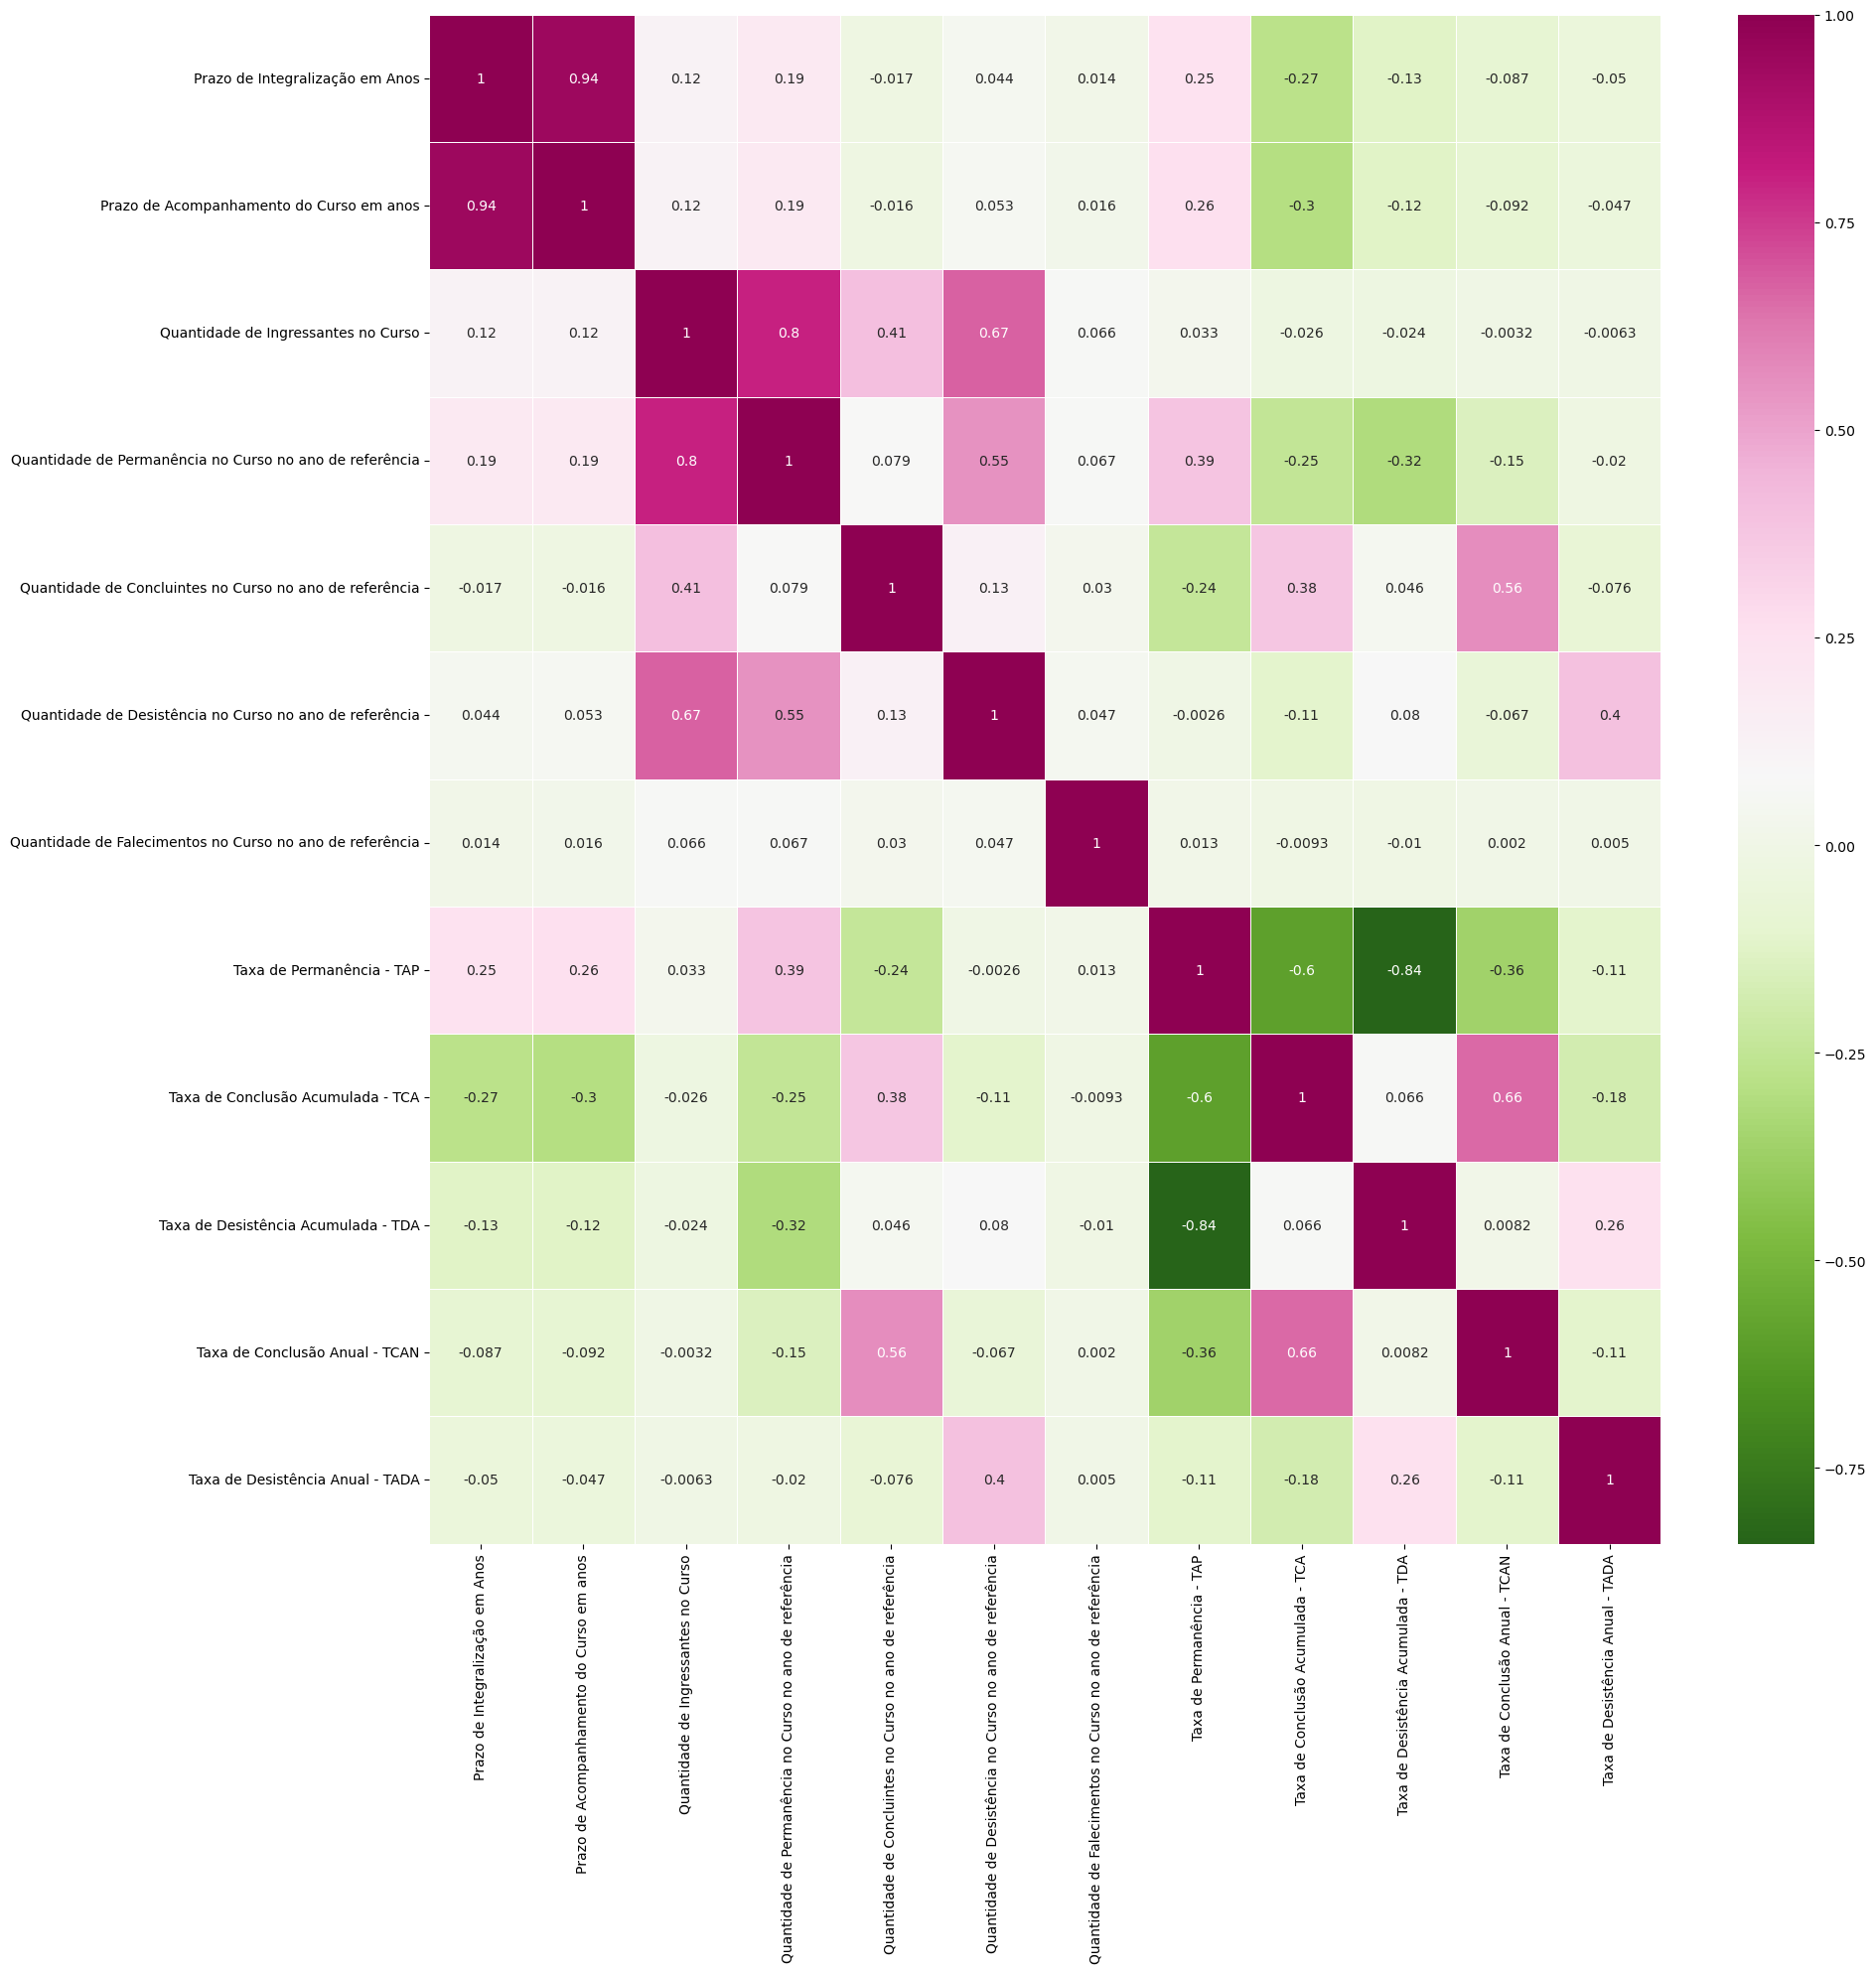

In [233]:
plt.figure(figsize=(20, 20))
sns.heatmap(variaveis_quantitativas.corr(),
			 annot=True, cmap="PiYG_r", linewidths=.5)
plt.show()


# Minerando Dados e Características do Dataset

Análisar quais features mais influenciam o target

# Modelos de Predição

# Processo e Estatísticas de Validação

# Conclusão 

# Referências Bibliográficas